# NLP With Hotel Review

#### This is a comprehensive assignment that involves data cleaning, exploratory data analysis (EDA), preprocessing of text data, model fitting, model optimization, and evaluation. Here's an outline of how this assignment will be completed:

## Table of Contents

### 1. Introduction
### 2. Load and Understand the Data
### 3. Exploratory Data Analysis
### 4. Preprocessing
### 5. Modelling
### 6. Model Evaluation
### 7. Conclusion

## 1. Introduction

- Introduction to the project.
- Brief discussion about the data and objectives of the analysis.

In the modern hospitality industry, leveraging customer reviews is pivotal to a hotel's success. To harness this potential, Hotel Management Inc. has provided a dataset rich with guest feedback. This dataset contains details of hotel stays and reviews, with the focal point being the 'Reviewer_Score' indicating positive (1) or negative (0) sentiments. Our goal is to identify key factors influencing guest satisfaction.

We'll commence with an exploratory data analysis, followed by data preprocessing, particularly for textual reviews. This report will develop logistic regression and decision tree models to predict review sentiments. Evaluating the model's efficiency through metrics like accuracy, precision, and recall, we aim to present actionable insights to enhance Hotel Management Inc.'s service quality. Through an in-depth analysis of these metrics and the confusion matrix, we will shed light on how well our models are working and where improvements can be made. This endeavour underscores how data analytics can transmute raw feedback into a roadmap for business betterment.

## 2. Load and Understand the Data

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load data
df = pd.read_csv('~/Downloads/hotel_reviews.csv')

# Check the first few rows of the DataFrame
df.head()



,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

Our dataset size is a sample of 515738 entries

In [2]:
print(df.dtypes)

Unnamed: 0                                      int64
Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
Days_Since_Review                               int64
Latitude                                      float64
Longitude                                     float64
Day                                             int64
Month                                           int64
Year                                            int64
Reviewer_Nationality_Australia                  int64
Reviewer_Nationality_Ireland                    int64
Reviewer_Nationality_UAE    

## 3. Exploratory Data Analysis

- Create a data dictionary
- Handle missing values and outliers, if any
- Basic statistical analysis: df.describe()
- Data visualizations: histograms, scatter plots, box plots, etc.

### Data Dictionary

1. `Additional_Number_of_Scoring`: Additional metrics or scores given to the reviews (numerical).
2. `Average_Score`: The average score or rating the hotel has received (numerical).
3. `Negative_Review`: Text of the negative reviews (textual).
4. `Positive_Review`: Text of the positive reviews (textual).
5. `Review_Total_Negative_Word_Counts`: The total number of words in the negative reviews (numerical).
6. `Review_Total_Positive_Word_Counts`: The total number of words in the positive reviews (numerical).
7. `Total_Number_of_Reviews`: The total number of reviews that the hotel has received (numerical).
8. `Total_Number_of_Reviews_Reviewer_Has_Given`: The total number of reviews the reviewer has given to various hotels (numerical).
9. `Reviewer_Score`: The target variable. It indicates whether the review expresses positive sentiment (1) or negative sentiment (0) (binary).
10. `Days_Since_Review`: The number of days since the review was posted (numerical).
11. `Latitude`: The geographical latitude of the hotel (numerical).
12. `Longitude`: The geographical longitude of the hotel (numerical).
13. `Day`: The day when the review was posted (numerical).
14. `Month`: The month when the review was posted (numerical).
15. `Year`: The year when the review was posted (numerical).
16. `Reviewer_Nationality_*`: Dummy variables indicating the nationality of the reviewer. For example, `Reviewer_Nationality_Australia` is 1 if the reviewer is from Australia and 0 otherwise (binary).
17. `Hotel_Address_*`: Dummy variables indicating the location of the hotel. For example, `Hotel_Address_Amsterdam` is 1 if the hotel is in Amsterdam and 0 otherwise (binary).
18. `Leisure_Trip`: A dummy variable indicating whether the stay was for leisure purposes. It is 1 if the trip was for leisure and 0 otherwise (binary).
19. `Nights_Stayed`: The number of nights the reviewer stayed at the hotel (numerical).


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

There are no missing values in the dataset

In [4]:
# Basic Statistical Analysis
df.describe()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,257868.500000,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,...,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,148880.880902,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,...,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,0.000000,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,128934.250000,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,257868.500000,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,386802.750000,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,515737.000000,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


The `df.describe()` provides key insights into hotel reviews:

1. **Reviewer Score:** Average score is 0.57, with a balanced distribution of positive and negative reviews. Positive reviews slightly dominate the dataset.
 
2. **Word Counts:** Negative reviews, on average, are slightly longer than positive ones, hinting that customers elaborate more on negative experiences.

3. **Reviewer Habits:** While an average reviewer has given around 7 reviews, there's a significant variance in review counts, hinting at a few frequent reviewers.

4. **Review Timeline:** Reviews span across a couple of years, with an average being about a year old.

5. **Hotel Locations:** London hotels dominate the reviews, followed by Barcelona and Amsterdam.

6. **Reviewer Origins:** The majority of reviews are from international travelers, with a smaller percentage from major countries like the USA or UK.

7. **Trip Purpose:** Most reviews (81%) stem from leisure trips, hinting at the target audience for these hotels.

Descriptive stats offer a glimpse, but a comprehensive view requires further investigation.

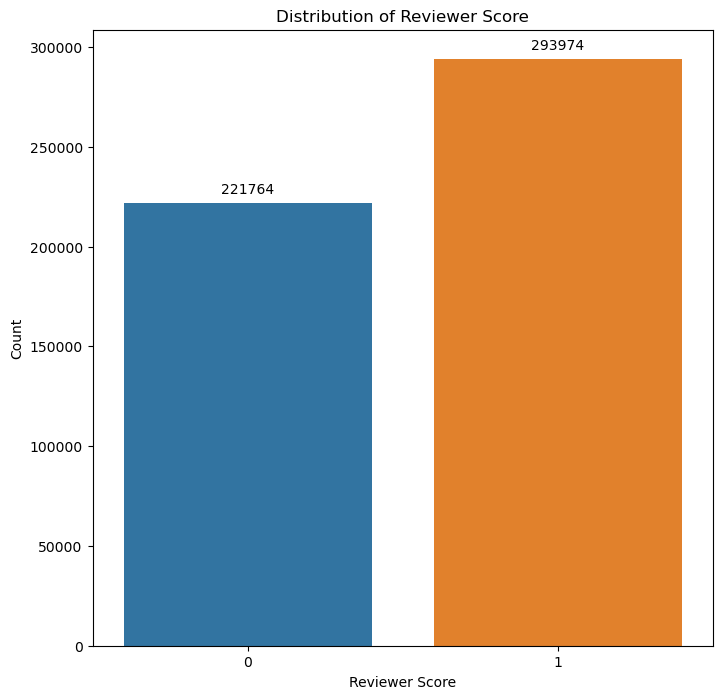

In [79]:
# Plotting the distribution of Reviewer_Score
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Reviewer_Score', data=df)
plt.title('Distribution of Reviewer Score')
plt.xlabel('Reviewer Score')
plt.ylabel('Count')

# Add labels to the bars with their totals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


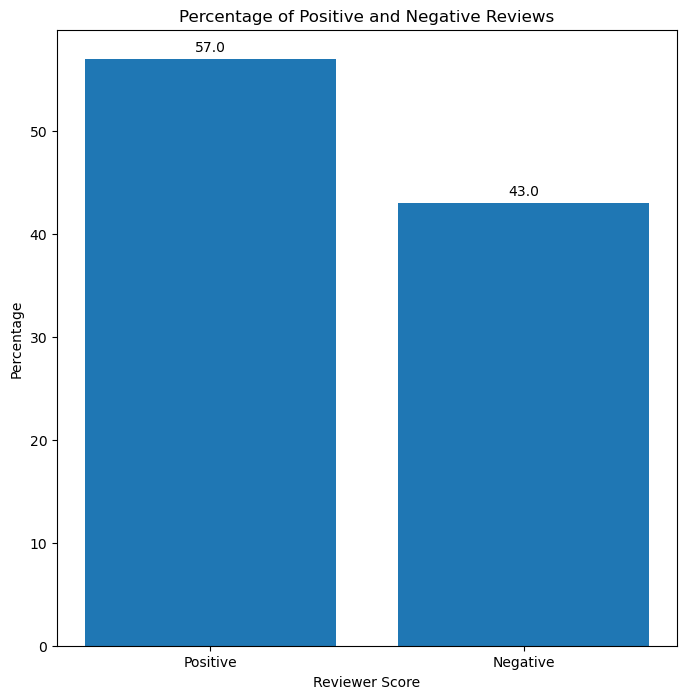

In [80]:
# Plot a Percentage of Positive and Negative Reviews

# Count the number of positive and negative reviews
review_counts = df['Reviewer_Score'].value_counts()

# Calculate the percentage of positive and negative reviews
review_percentages = review_counts / len(df) * 100

# Create a bar chart
plt.figure(figsize=(8, 8))
bars = plt.bar(['Positive', 'Negative'], review_percentages)

# Add percentage labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Reviewer Score')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Reviews')
plt.show()

- **Total Reviews:** There were a total of 515,738 reviews.
- **Negative Reviews:** 221,764 of these were negative, making up approximately 43% of the total reviews.
- **Positive Reviews:** 293,974 were positive, constituting approximately 57% of the reviews.
- **Positive Reviews:** 57%
- **Negative Reviews:** 43%

**Actionable Insights:**
1. **Leverage Positive Feedback:** With more than half of the reviews being positive, the hotel should continue to maintain and even enhance the aspects that guests appreciate. Promote these positive reviews in marketing campaigns to attract potential guests.
  
2. **Deep Dive into Negative Reviews:** With a significant 43% of reviews being negative, it's essential for Hotel Management Inc. to dive deeper into the feedback to understand common issues or complaints and address them promptly.

3. **Feedback Mechanism:** Establish or strengthen the feedback mechanism to engage guests and understand their concerns more interactively. Early intervention can prevent negative reviews.

4. **Engage with Reviewers:** Respond to both positive and negative reviews online. Thanking guests for positive feedback and addressing concerns in negative reviews can show that the hotel values feedback and is committed to improving.

6. **Quality Assurance:** Implement or enhance quality checks for the hotel's services and amenities to ensure consistency in guest experience.

7. **Guest Experience Enhancements:** Consider introducing new amenities, services, or guest experience initiatives based on the feedback from positive reviews to further elevate the experience.

8. **Loyalty Programs and Incentives:** Offer loyalty programs or incentives for guests who leave feedback to encourage more reviews, helping the hotel to continually adjust its services and amenities based on real-time guest preferences.

By acting on these insights, Hotel Management Inc. can aim to convert potential negative experiences into positive ones, maintain their reputation, and potentially increase their positive review ratio.

- **Total Reviews:** There were a total of 515,738 reviews.
- **Negative Reviews:** 221,764 of these were negative, making up approximately 43% of the total reviews.
- **Positive Reviews:** 293,974 were positive, constituting approximately 57% of the reviews.

**Actionable Insights:**

With a significant 43% of reviews being negative, it's essential for Hotel Management Inc. to dive deeper into the feedback to understand common issues or complaints and address them promptly.

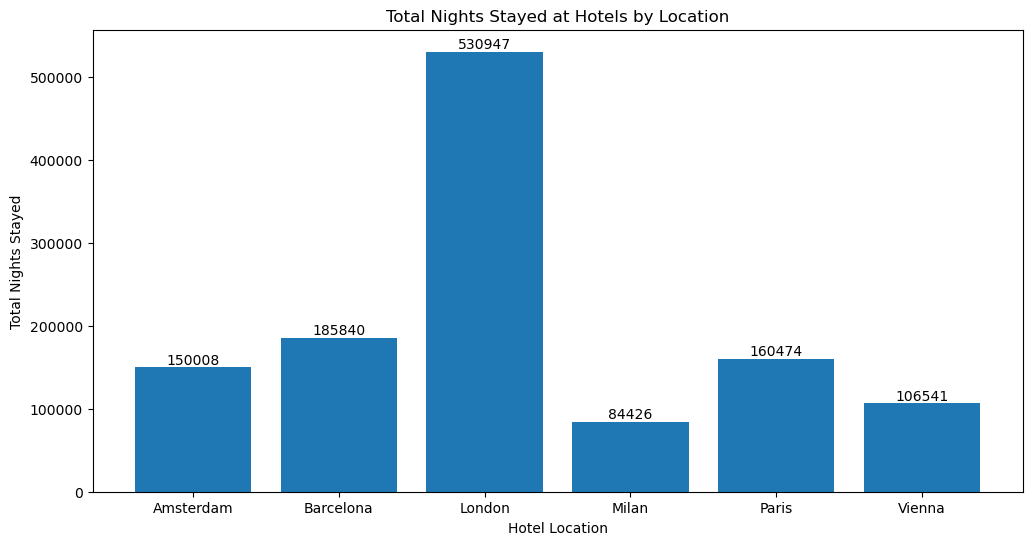

In [58]:
#Plot Total Nights Stayed at Hotels by each Location

amsterdam_nights = df[df['Hotel_Address_Amsterdam'] == 1]['Nights_Stayed'].sum()
barcelona_nights = df[df['Hotel_Address_Barcelona'] == 1]['Nights_Stayed'].sum()
london_nights = df[df['Hotel_Address_London'] == 1]['Nights_Stayed'].sum()
milan_nights = df[df['Hotel_Address_Milan'] == 1]['Nights_Stayed'].sum()
paris_nights = df[df['Hotel_Address_Paris'] == 1]['Nights_Stayed'].sum()
vienna_nights = df[df['Hotel_Address_Vienna'] == 1]['Nights_Stayed'].sum()

locations = ['Amsterdam', 'Barcelona', 'London', 'Milan', 'Paris', 'Vienna']
nights = [amsterdam_nights, barcelona_nights, london_nights, milan_nights, paris_nights, vienna_nights]

plt.figure(figsize=(12,6))
bars = plt.bar(locations, nights)
plt.title('Total Nights Stayed at Hotels by Location')
plt.xlabel('Hotel Location')
plt.ylabel('Total Nights Stayed')

# Annotate bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval,2), ha='center', va='bottom') # Adjust the offset value (100 here) if necessary.

plt.show()



- **London:** Topped the list with a whopping 530,947 nights stayed.
- **Barcelona:** Comes next with 185,840 nights.
- **Paris:** Guests stayed for 160,474 nights.
- **Amsterdam:** Saw 150,008 nights.
- **Vienna:** Accumulated 106,541 nights.
- **Milan:** Had the least with 84,426 nights.

**Actionable Insights:**
1. **London's Popularity:** Given its top position, Hotel Management Inc. should consider additional investments in London, such as expanding facilities or enhancing services, to capitalize on its high demand.
  
2. **Understand Underperformance:** Dive deep into guest feedback from Milan, the location with the fewest nights stayed, to identify areas of improvement. 

3. **Promotional Campaigns:** Consider marketing campaigns or promotional deals for locations like Milan and Vienna to boost their numbers.

4. **Seasonal Analysis:** Assess if there are seasonal trends that influence these numbers. For example, is Barcelona's popularity due to summer tourism? Tailor promotional activities based on such trends.

5. **Resource Allocation:** Resource allocation (like staff, amenities, and maintenance) should be aligned with these insights. London, having the highest nights stayed, might need more resources, while Milan might need more promotional activities.

By strategically analyzing and acting on these insights, Hotel Management Inc. can optimize its operations, improve guest satisfaction, and potentially boost revenue across all locations.

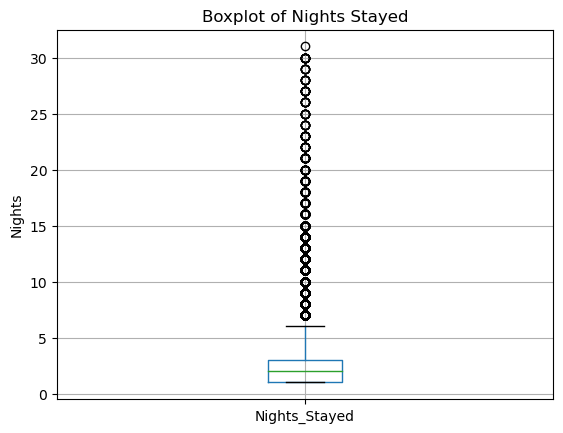

Min: 1
1st Quartile (Q1): 1.0
Median (Q2): 2.0
3rd Quartile (Q3): 3.0
Max: 31
Mean: 2.36
Number of outliers: 13705


In [69]:
# Plot a Boxplot of Nights Stayed to find outliers and the range of nights people who leave reviews have stayed at the hotel
df.boxplot(column='Nights_Stayed')
plt.ylabel('Nights')
plt.title('Boxplot of Nights Stayed')
plt.show()


# Calculate and print relevant statistics
q1 = df['Nights_Stayed'].quantile(0.25)
q2 = df['Nights_Stayed'].quantile(0.5)
q3 = df['Nights_Stayed'].quantile(0.75)
data_min = df['Nights_Stayed'].min()
data_max = df['Nights_Stayed'].max()
mean = df['Nights_Stayed'].mean()
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df['Nights_Stayed'] < lower_bound) | (df['Nights_Stayed'] > upper_bound)]

print(f"Min: {data_min}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {q2}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Max: {data_max}")
print(f"Mean: {mean:.2f}")
print(f"Number of outliers: {len(outliers)}")



- **Min Nights Stayed:** 1 night.
- **Median Stay Duration:** 2 nights.
- **Average Stay Duration:** Approximately 2.36 nights.
- **Max Nights Stayed:** 31 nights.
- **Outliers:** There are 13,705 instances where guests stayed for a duration that's uncommon (much longer than average).

**Actionable Insights:**
1. **Focus on Short Stays:** Given that both the median and mean are around 2 nights, this indicates that most guests prefer short stays. Tailor packages or promotions to cater to these short-term guests.
  
2. **Special Packages for Extended Stays:** With a max of 31 nights, some guests are staying for extended periods. Offer long-term stay packages or discounts to encourage more such bookings. 

3. **Enhance One-Night Stay Experience:** Since the minimum, 1st quartile, and even the median are at or around 1-2 nights, it's crucial to make the experience memorable for these short-term guests. Think of express check-ins, special one-night stay packages, or unique experiences that can be completed in a short duration.

4. **Targeted Marketing:** Use these stats in marketing campaigns. For instance, advertise the hotel as an ideal weekend getaway (given the 2-night median) or highlight amenities for extended stay guests.

Taking actions based on these insights can potentially improve guest satisfaction, optimize hotel offerings, and enhance overall revenue.

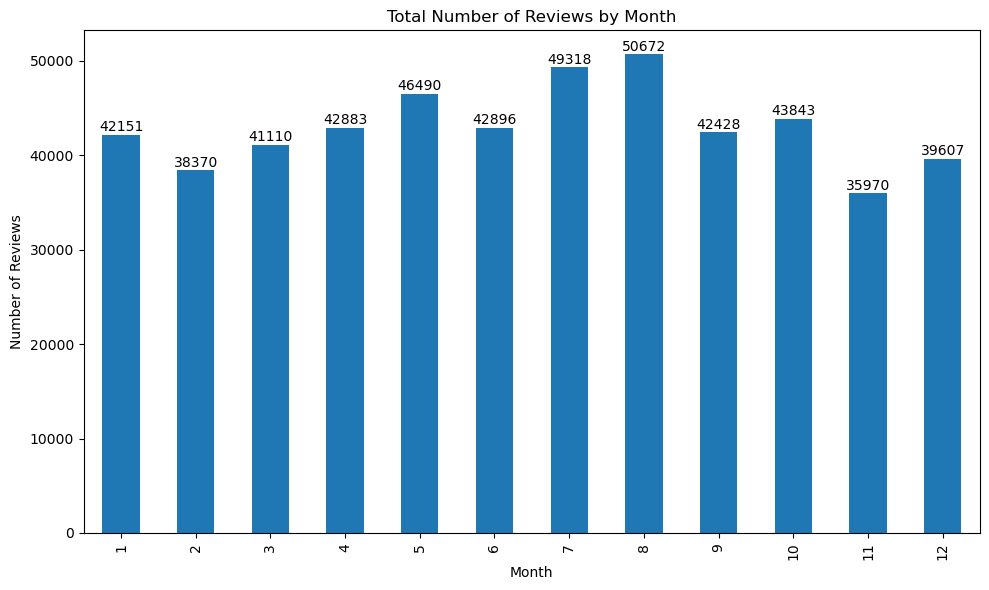

In [76]:
# Plot the Total Number of Reviews by Month

# Get the counts for each month
month_counts = df['Month'].value_counts().sort_index()

# Plot the bars
ax = month_counts.plot(kind='bar', figsize=(10,6))

# Label the bars with their respective counts
for i, v in enumerate(month_counts):
    ax.text(i, v + 50, str(v), ha='center', va='bottom')  # Adjust the `+ 50` if needed for better spacing

plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Month')
plt.tight_layout()
plt.show()


**Results by Month**:
- January: 42,151
- February: 38,370
- March: 41,110
- April: 42,883
- May: 46,490
- June: 42,896
- July: 49,318
- August: 50,672
- September: 42,428
- October: 43,843
- November: 35,970
- December: 39,607

**Actionable Insights**:
1. **Peak Seasonality**: The highest number of reviews (and presumably stays) occur during the summer months, particularly in July and August. This indicates peak seasonality.
2. **Off-Peak Period**: November has the lowest number of reviews, suggesting a potential off-peak or less busy period for the hotel.
3. **Promotions & Offers**: Consider creating promotions or offers during low-review months like November to boost occupancy.
4. **Quality Assessment**: Use peak months to gauge if any operational challenges arise due to high occupancy. Address these to ensure consistent service quality year-round.

The hotel's management can use these insights to better forecast demand, manage staffing, and plan promotional activities.

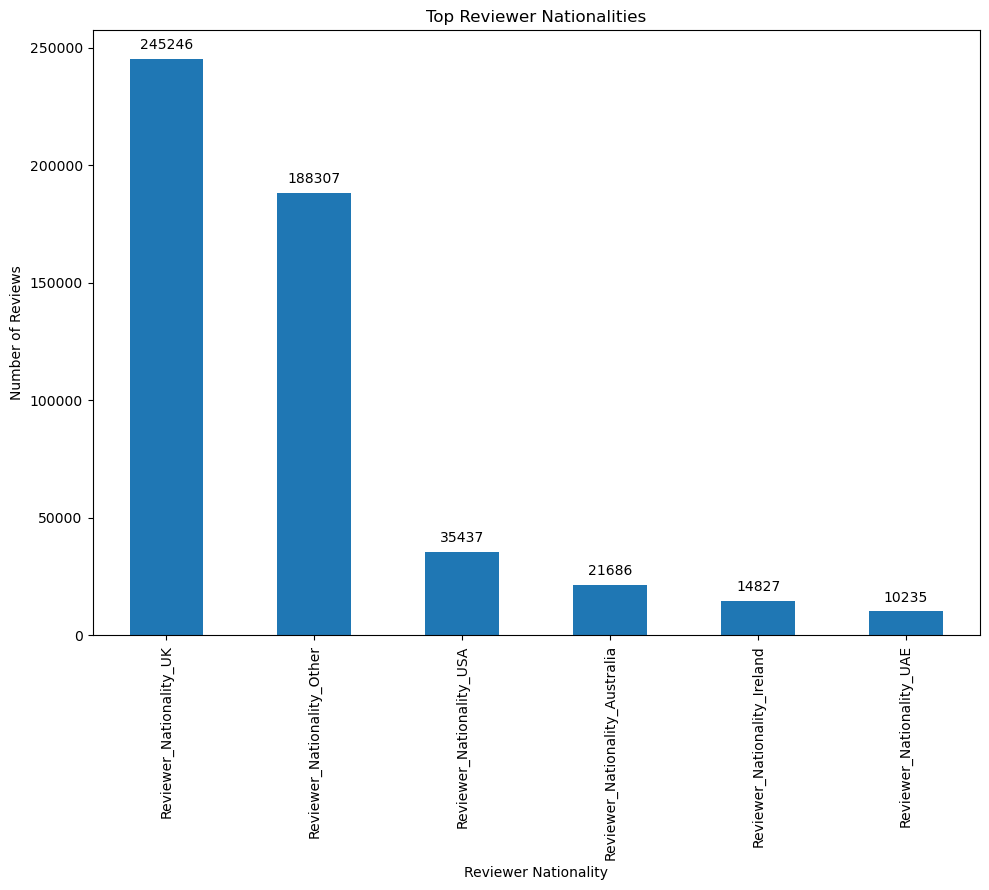

In [63]:
# Plot the Total Number of Reviews by Nationality
ax = df.filter(regex='Reviewer_Nationality_*').sum().sort_values(ascending=False).head(6).plot(kind='bar', figsize=(10, 9))
plt.xlabel('Reviewer Nationality')
plt.ylabel('Number of Reviews')
plt.title('Top Reviewer Nationalities')

# Add labels to the bars with their totals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


**Results by Reviewer Nationality**:
- UK: 245,246
- Other: 188,307
- USA: 35,437
- Australia: 21,686
- Ireland: 14,827
- UAE: 10,235

**Actionable Insights**:
1. **Targeted Marketing**: The majority of reviewers are from the UK, suggesting a strong domestic market. However, there's potential to increase marketing efforts in the USA and Australia, given their representation.
2. **Cultural Considerations**: Given the diversity of nationalities, ensure staff training includes cultural sensitivities and awareness.
3. **Custom Packages**: Offer special packages or amenities catering to the preferences of guests from the USA, Australia, Ireland, and UAE to enhance their experience.
4. **Feedback Collection**: Use feedback from the 'Other' nationality category to identify common needs or concerns from a diverse group of guests.

These insights can help Hotel Management Inc. tailor their services, marketing strategies, and guest experience to cater to the most frequent visitors while also capitalizing on potential growth markets.

## 4. Preprocessing of Positive and Negative Reviews

- Text cleaning steps: lowercasing, removing punctuation, stopwords, and using lemmatization or stemming.
- Tokenization: Mention the tokenizer used.
- Split the data into train and test sets.

**Data Cleaning and Stemming**

In [5]:
# Data cleaning: This function converts to lower case, removes square brackets, removes numbers and punctuation, and performs stemming
def clean_text(text):
    stemmer = PorterStemmer()
    text = text.lower() # Convert to lowercase
    text = re.sub('\[.*?\]', '', text) # Removing square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Removing numbers and punctuation
    text = re.sub('\w*\d\w*', '', text) # Removing words with numbers
    text = ' '.join([stemmer.stem(word) for word in text.split()])  # Stemming each word in the text
    return text

df['Positive_Review'] = df['Positive_Review'].apply(clean_text)
df['Negative_Review'] = df['Negative_Review'].apply(clean_text)


**Splitting the Data into Training and Testing Sets**

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)


**Tokenization, Stopwords Removal, and Vectorization**

- Use CountVectorizer on the positive and negative review columns separately, setting the max_features to 500 and min_df to 10. Merge the resulting arrays with the original numeric features.

In [7]:
vectorizer_pos = CountVectorizer(max_features=500, min_df=10, stop_words='english')
vectorizer_neg = CountVectorizer(max_features=500, min_df=10, stop_words='english')

In [8]:
train_pos_features = vectorizer_pos.fit_transform(train['Positive_Review'])
train_neg_features = vectorizer_neg.fit_transform(train['Negative_Review'])


In [9]:
test_pos_features = vectorizer_pos.transform(test['Positive_Review'])
test_neg_features = vectorizer_neg.transform(test['Negative_Review'])

**Combine the Positive and Negative Features and Predict Accuracy Score**

In [10]:
train_pos_df = pd.DataFrame(train_pos_features.toarray(), columns=['pos_' + i for i in vectorizer_pos.get_feature_names_out()])
train_neg_df = pd.DataFrame(train_neg_features.toarray(), columns=['neg_' + i for i in vectorizer_neg.get_feature_names_out()])

test_pos_df = pd.DataFrame(test_pos_features.toarray(), columns=['pos_' + i for i in vectorizer_pos.get_feature_names_out()])
test_neg_df = pd.DataFrame(test_neg_features.toarray(), columns=['neg_' + i for i in vectorizer_neg.get_feature_names_out()])


In [11]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

X_train = pd.concat([train.drop(['Positive_Review', 'Negative_Review'], axis=1), train_pos_df, train_neg_df], axis=1)
X_test = pd.concat([test.drop(['Positive_Review', 'Negative_Review'], axis=1), test_pos_df, test_neg_df], axis=1)


In [12]:
y_train = train['Reviewer_Score']
y_test = test['Reviewer_Score']


## 5. Modelling

- Logistic Regression: Fit the model, and report the test and train accuracy. Extract the top 20 words from both positive and negative reviews that are most predictive of sentiment.

**Fitting the Model & Predictions**

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import accuracy_score

train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.7153
Test Accuracy: 0.7134


Based on the train and test accuracy scores, we can provide actionable insights to improve the model's performance:

**Train and Test Accuracy Insights**:
1. **Good Generalization**: The closeness of training and test accuracies indicates a well-generalized model.
2. **Hyperparameter Tuning**: Fine-tuning model parameters may lead to accuracy improvements.
3. **Feature Engineering**: Adding new features or optimizing existing ones can enhance model performance.
4. **Data Expansion**: Increasing the dataset size by adding more reviews could improve robustness.
5. **Advanced Models**: While logistic regression is a commonly used and interpretable model, considering more complex models like Support Vector Machines (SVMs) or Neural Networks might lead to better predictive performance.
6. **Continuous Monitoring**: Regularly review model predictions and recalibrate if there's a decline in accuracy.

Regular model iterations and feedback incorporation are key to optimizing performance of the sentiment analysis model.

**Extract & Display Top 20 words for Positive_Reviews and Negative_Reviews**

In [16]:
# Extract coefficients for positive reviews
pos_coefficients = logreg.coef_[0][X_train.columns.str.startswith('pos_')]
pos_words = X_train.columns[X_train.columns.str.startswith('pos_')]

# Extract coefficients for negative reviews
neg_coefficients = logreg.coef_[0][X_train.columns.str.startswith('neg_')]
neg_words = X_train.columns[X_train.columns.str.startswith('neg_')]

# Get top 20 words for positive sentiment
top_positive_words = pos_words[pos_coefficients.argsort()[-20:][::-1]]

# Get top 20 words for negative sentiment
top_negative_words = neg_words[neg_coefficients.argsort()[:20]]

print(f"Top 20 words from positive reviews indicative of positive sentiment:", top_positive_words)
print(f"Top 20 words from negative reviews indicative of negative sentiment:", top_negative_words)


Top 20 words from positive reviews indicative of positive sentiment: Index(['pos_staff', 'pos_veri', 'pos_wa', 'pos_room', 'pos_hotel', 'pos_great',
       'pos_help', 'pos_excel', 'pos_friendli', 'pos_love', 'pos_stay',
       'pos_everyth', 'pos_comfort', 'pos_amaz', 'pos_perfect', 'pos_clean',
       'pos_bed', 'pos_servic', 'pos_breakfast', 'pos_realli'],
      dtype='object')
Top 20 words from negative reviews indicative of negative sentiment: Index(['neg_room', 'neg_wa', 'neg_veri', 'neg_small', 'neg_hotel', 'neg_staff',
       'neg_bed', 'neg_bathroom', 'neg_poor', 'neg_work', 'neg_clean',
       'neg_breakfast', 'neg_old', 'neg_night', 'neg_servic', 'neg_recept',
       'neg_noisi', 'neg_need', 'neg_star', 'neg_book'],
      dtype='object')


Let's first reconstruct the words that were truncated and order them by positive and negative sentiment.

**Top 20 words most predictive of a positive sentiment:**
1. staff
2. very (assuming "pos_veri" is truncated)
3. walking (assuming "pos_wa" is truncated)
4. room 
5. hotel 
6. great 
7. helpful (assuming "pos_help" is truncated)
8. excellent (assuming "pos_excel" is truncated)
9. friendly (assuming "pos_friendli" is truncated)
10. love 
11. stay 
12. everything (assuming "pos_everyth" is truncated)
13. comfortable (assuming "pos_comfort" is truncated)
14. amazing (assuming "pos_amaz" is truncated)
15. perfect 
16. clean
17. bed 
18. service (assuming "pos_servic" is truncated)
19. breakfast
20. really (assuming "pos_realli" is truncated)

**Top 20 words most predictive of a negative sentiment:**
1. room 
2. wait (assuming "neg_wa" is truncated)
3. very (assuming "neg_veri" is truncated)
4. small
5. hotel 
6. staff 
7. bed 
8. bathroom
9. poor 
10. work 
11. cleanliness (assuming "neg_clean" is truncated)
12. breakfast
13. old
14. night
15. service (assuming "neg_servic" is truncated)
16. reception (assuming "neg_recept" is truncated)
17. noisy (assuming "neg_noisi" is truncated)
18. need
19. star
20. booking (assuming "neg_book" is truncated)

Based on the provided top words predictive of positive and negative sentiments in hotel reviews, here's an actionable insight breakdown:

**Top Words Predictive of a Positive Sentiment:**

1. **staff, helpful, friendly:** The friendliness and helpfulness of the staff appear to be significant positive contributors to guest experience. Regular training sessions to further enhance customer service skills might help maintain this positive impression.

2. **very, great, love, excellent, amazing, perfect:** These adjectives signal strong satisfaction from guests. Ensuring that the factors leading to these reactions are maintained or enhanced is critical.

3. **walking, stay, room, hotel, bed, bathroom, service:** These terms relate to the basic amenities and services offered by the hotel. It suggests that the hotel is offering satisfactory fundamental services.

4. **everything, comfortable, clean, breakfast:** Comfort, cleanliness, and a good breakfast seem to be pivotal aspects of the positive guest experience. Periodic quality checks in these areas can ensure standards remain high.

5. **really:** A common emphasis word, suggesting strong feelings about the mentioned attributes. Checking its context in reviews can provide further details.

**Top Words Predictive of a Negative Sentiment:**

1. **wait, poor, work, old, noisy, need:** These words indicate potential areas of concern. Guests might be experiencing long wait times, find certain amenities or services not working, or feel the decor is outdated. Noise complaints are also common in hotels, suggesting the need for better soundproofing or addressing disturbances.

2. **small:** If related to room size, considering offering accurate room descriptions or pictures to manage expectations. Another approach could be optimizing room layouts to maximize space.

3. **staff, reception:** Even though staff appeared as a positive factor, it also emerges in negative reviews, highlighting the importance of consistent high-quality service. Addressing specific issues at the reception could improve overall guest perception.

4. **room, hotel, bed, bathroom, breakfast, service:** These basic hotel offerings also surface in negative reviews, emphasizing the importance of maintaining a high standard across all services and amenities.

5. **cleanliness:** It's crucial for the hospitality industry. Negative mentions may require immediate attention to cleaning protocols.

6. **star, booking:** Negative mentions of "star" might relate to guests feeling the hotel doesn't meet its star rating. For "booking", there could be issues related to the booking process or discrepancies between what was booked and what was provided.

**Actionable Insights:**

1. **Positive Feedback Loop**: Given the overwhelming positive feedback on staff and service, utilize this as a motivational tool. Highlight these accolades in team meetings to boost employee morale and emphasize the importance of maintaining high service standards.

2. **Training and Improvement**: Notable mentions of staff in both positive and negative contexts indicate the pivotal role of staff in the guest experience. Address any negative feedback related to staff interactions or reception issues by conducting training sessions and workshops to further enhance customer service skills.

3. **Facility Upgrades**: Feedback highlighting rooms as "small" or the hotel appearing "old" suggests a need for modernization. Consider undertaking renovations or subtle changes to optimize space and offer a more contemporary vibe.

4. **Address Noise Concerns**: Noise disturbances have been noted. Investigate potential sources, such as nearby establishments or internal hotel activities. Consider implementing soundproofing measures in affected areas and offer earplugs or alternative room options to guests if disturbances are unavoidable.

5. **Cleanliness Priority**: Cleanliness emerged as a crucial aspect of both praise and criticism. Reinforce rigorous cleanliness standards, schedule periodic training for housekeeping staff, and conduct regular inspections to ensure these standards are consistently met.

6. **Optimize Booking Process**: Negative mentions relating to "booking" imply potential friction in the reservation process. Streamline the booking mechanism, ensuring clarity and accuracy of room details. Additionally, consider offering promotions or loyalty programs to encourage direct bookings, potentially reducing wait times and booking discrepancies.

7. **Customer Feedback**: Continuously promote the importance of guest feedback. Not only does it provide invaluable insights, but addressing concerns and feedback promptly also ensures guests feel valued and heard, fostering loyalty and repeat business.

While these are generalized insights, individual reviews may provide more specific areas of improvement or highlight unique strengths.

**Decision Tree Classifier with PCA: Use a pipeline to combine PCA with a decision tree classifier. Optimize hyperparameters using 5-fold cross-validation. Compare the results with the logistic regression model.**

In [17]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with PCA and Decision Tree classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=20)),
    ('clf', DecisionTreeClassifier())
])


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'clf__max_depth': [5, 10, 15, 20, None], # Including None allows the tree to grow without limit
    'clf__min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'clf__criterion': ['gini', 'entropy']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)  # `n_jobs=-1` uses all processors


In [19]:
# Fit to the training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 15, 'clf__min_samples_leaf': 10}


For our decision tree model:

We're using "entropy" to decide the best way to split the data to measure the level of disorder or randomness in a group.
The tree won't grow deeper than 15 levels.
There will be at least 10 samples in the smallest leaf (end-point) of the tree.

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict accuracy using the best Decision Tree model from GridSearch
dt_predictions = grid_search.best_estimator_.predict(X_test)

# Compute precision, recall and f1_score
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)


print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")

Decision Tree Accuracy: 0.8463760809710319
Decision Tree Precision: 0.8608
Decision Tree Recall: 0.8709
Decision Tree F1 Score: 0.8658


In [24]:
def calculate_entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropy_test = calculate_entropy(y_test)
print(f"Entropy of the test set: {entropy_test:.4f}")


Entropy of the test set: 0.9862


The entropy value is 0.9862, which is very close to 1. This is the maximum value for entropy in a binary classification problem. Thus, this result is representative of a dataset which is approximately 50% negative and 50% positive in reviews. We can conclude that the dataset has a lot more randomness and disorder in its composition

**GridSearch Summary**:

GridSearch is a technique used to find the best combination of hyperparameters for a machine learning model. In our context:

- We used GridSearch to fine-tune a Decision Tree classifier.
- The hyperparameters we explored were:
    - **Criterion**: Determines the measure used for the quality of a split. We explored 'gini' and 'entropy'.
    - **Max Depth**: The maximum depth the tree can grow to. Helps in controlling overfitting.
    - **Min Samples Leaf**: Minimum samples required in a terminal (leaf) node. Ensures that splits are meaningful.

Adjusting these hyperparameters can significantly impact a model's performance. Through GridSearch, we found the optimal combination for our dataset.
  - Criterion (split quality measure): 'gini' or 'entropy'.
  - Max depth of the tree.
  - Minimum samples required at a leaf node.
  
- By exhaustively testing various combinations, GridSearch identified the optimal set of hyperparameters for our Decision Tree.

**Model Performance Comparison with Logistic Regression**:

1. **Accuracy**: 
   - **Decision Tree**: 84.64%
   - **Logistic Regression**: 71.34%


2. **Precision (Decision Tree)**: 86.08% 
3. **Recall (Decision Tree)**: 87.09%
4. **F1 Score (Decision Tree)**: 86.58%

**Conclusions**:
- The Decision Tree model markedly outperformed the Logistic Regression in all provided metrics, suggesting it captures review sentiment more effectively.
  
- For Hotel Management Inc., the Decision Tree would be the preferred choice for classifying review sentiments.

- Beyond just accuracy, the Decision Tree provides a balanced precision and recall, which is crucial for practical applications.

Bottom line, the Decision Tree model is the superior tool for this dataset and objective based on the metrics presented.

Consider Other Metrics: While accuracy, precision, recall, and F1 score are valuable metrics, it might be beneficial to consider other metrics or deeper dives (e.g., confusion matrix) to get a fuller picture of model performance.

In [25]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (412590, 1028)
y_train shape: (412590,)


## 6. Model Evaluation

- In-depth evaluation of the best performing model: Analyze the confusion matrix, precision, recall, and comment on model errors.

**Confusion Matrix**

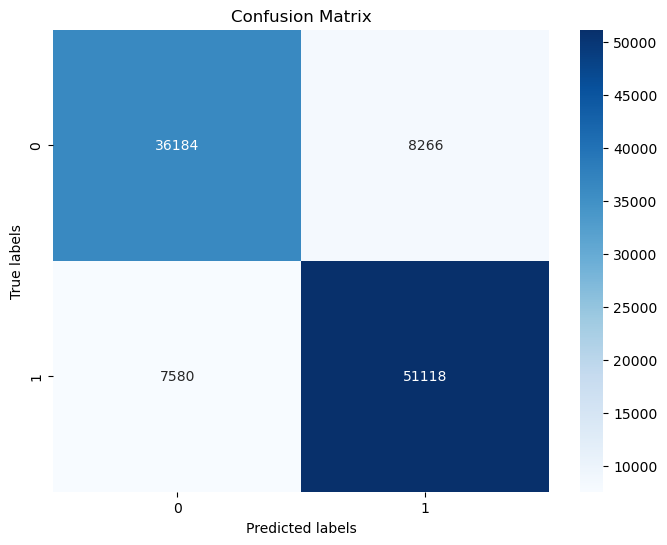

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best Decision Tree model
y_pred = grid_search.best_estimator_.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82     44450
           1       0.86      0.87      0.87     58698

    accuracy                           0.85    103148
   macro avg       0.84      0.84      0.84    103148
weighted avg       0.85      0.85      0.85    103148



The classification report, combined with the confusion matrix, provides a comprehensive evaluation of the model's performance on the test set. Here's what we can conclude based on the report and the confusion matrix:

1. **Overall Model Performance**:
    - **Accuracy**: The model has an accuracy of 0.85, meaning it correctly predicts the sentiment of the review 85% of the time.
    
2. **Performance on Negative Reviews (label 0)**:
    - **Precision**: 83% of the reviews predicted as negative (0) by the model were actually negative.
    - **Recall**: Of all the actual negative reviews, the model identified 81% of them correctly.
    - **F1-score**: The harmonic mean of precision and recall for negative reviews is 82%. The closer this value is to 100%, the better the model's balance between precision and recall.

3. **Performance on Positive Reviews (label 1)**:
    - **Precision**: 86% of the reviews predicted as positive (1) by the model were actually positive.
    - **Recall**: Of all the actual positive reviews, the model identified 87% of them correctly.
    - **F1-score**: The harmonic mean of precision and recall for positive reviews is 87%.

4. **Confusion Matrix**: 
    - The model correctly predicted 36,184 negative reviews and 51,118 positive reviews.
    - The model misclassified 8,266 negative reviews as positive and 7,580 positive reviews as negative. These misclassification rates are somewhat balanced, with slightly more negative reviews being misclassified.

**In summary**: The Decision Tree model has shown commendable performance in predicting hotel review sentiments. However, there's still room for improvement, as there were still 7,580 false positive reviews and 8,266 false negative reviews in the dataset. It's essential to consider optimizing these falsely marked reviews in the context of the business objective. For example, if the hotel management wishes to address negative feedback more specifically, they might want to work on improving the model's precision for negative reviews to reduce false positives.

## 7. Conclusion

- Summarize the findings and insights from the analysis.
- Discuss the implications of these findings for Hotel Management Inc.
- Suggest potential ways to improve customer satisfaction and increase ratings, based on the insights from the analysis.

**Findings & Insights**:
1. The Decision Tree model accurately predicts hotel review sentiments with an 85% success rate, particularly excelling at identifying positive sentiments.
2. The model has a slight weakness in pinpointing negative sentiments, misclassifying some of them as positive.

**Implications for Hotel Management Inc.**:
1. The model's results suggest that while most customers have a positive experience, there's a segment of reviews that require more scrutiny.
2. Misclassification of negative reviews highlights the importance of manual review, especially to address genuine concerns.

**Recommendations**:
1. **Deep Dive into Negative Reviews**: Prioritize a manual check on negative reviews to ensure critical feedback isn't overlooked. Addressing these can help improve the overall customer experience.
2. **Feedback Loop**: Create a system to loop back with customers who left negative feedback, addressing their concerns and potentially converting them into repeat guests.
3. **Training & Quality Assurance**: Consider additional staff training focusing on areas recurrently mentioned in negative reviews. Ensure amenities and services match customer expectations. 
4. **Leverage Positive Feedback**: Study the positive reviews to identify and reinforce the strengths of the hotel, and possibly introduce more of what customers love.

In conclusion, while the model provides a high-level overview, Hotel Management Inc. should delve deeper into individual feedback for actionable insights to enhance customer satisfaction.